1. What is the difference between K-Means and Hierarchical Clustering? Provide a use case for each.
- K-Means is an iterative, partitioning algorithm that requires pre-defining the number of clusters, making it fast and suitable for large datasets with spherical clusters. Hierarchical Clustering builds a tree-like dendrogram of nested clusters, does not require a predefined, and handles complex shapes, but is computationally expensive for large data.

2. Explain the purpose of the Silhouette Score in evaluating clustering algorithms.
- The Silhouette Score is a metric used to evaluate the quality of clustering algorithms by measuring how well each data point fits into its assigned cluster compared to others.

3.  What are the core parameters of DBSCAN, and how do they influence the
clustering process?
- DBSCAN (Density-Based Spatial Clustering of Applications with Noise) relies on two core parameters, epsilon and min_samples.

4. Why is feature scaling important when applying clustering algorithms like
K-Means and DBSCAN?
- Feature scaling is crucial for K-Means and DBSCAN because they are distance-based algorithms, meaning they calculate the similarity between data points using metrics like Euclidean distance.

5.  What is the Elbow Method in K-Means clustering and how does it help
determine the optimal number of clusters?
- The Elbow Method is a visual heuristic used in K-Means clustering to determine the optimal number of clusters by plotting the within-cluster sum of squares against a range of values. It identifies the value where WCSS reduction slows significantly, forming an "elbow" point that balances model compactness and simplicity.

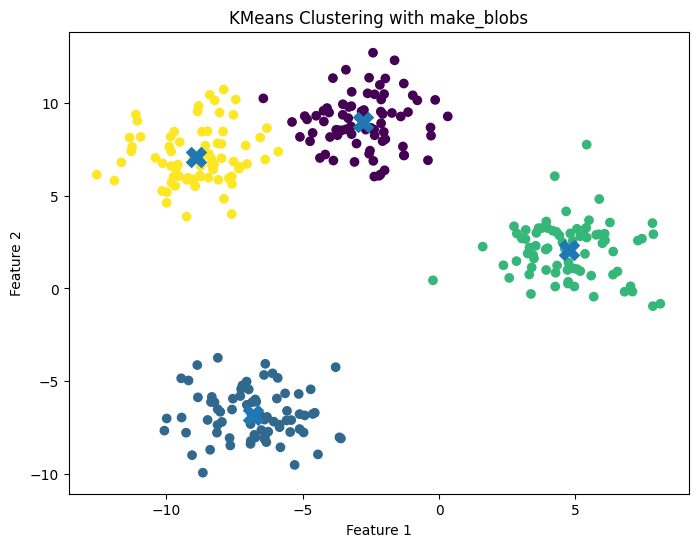

In [1]:
#6. Generate synthetic data using make_blobs(n_samples=300, centers=4), apply KMeans clusterig, and visualize the results with cluster centers.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y_true = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=1.5)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200)
plt.title("KMeans Clustering with make_blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [2]:
#7.  Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np
wine = load_wine()
X = wine.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN(eps=2, min_samples=5)
labels = dbscan.fit_predict(X_scaled)
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters found (excluding noise):", num_clusters)

Number of clusters found (excluding noise): 5


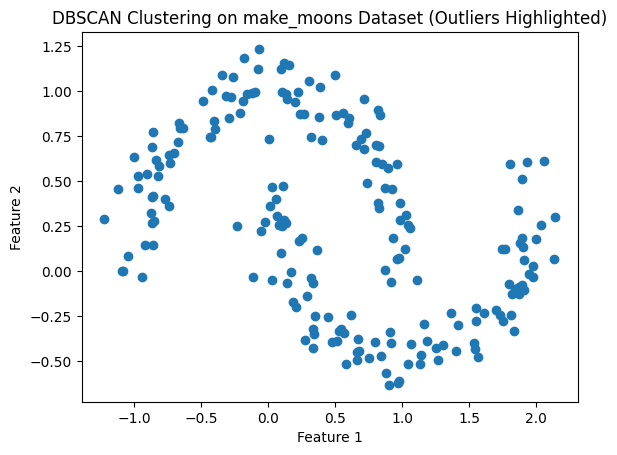

In [3]:
#8. Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)
outliers = labels == -1
clusters = labels != -1
plt.figure()
plt.scatter(X[clusters, 0], X[clusters, 1])
plt.scatter(X[outliers, 0], X[outliers, 1], marker='x')
plt.title("DBSCAN Clustering on make_moons Dataset (Outliers Highlighted)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

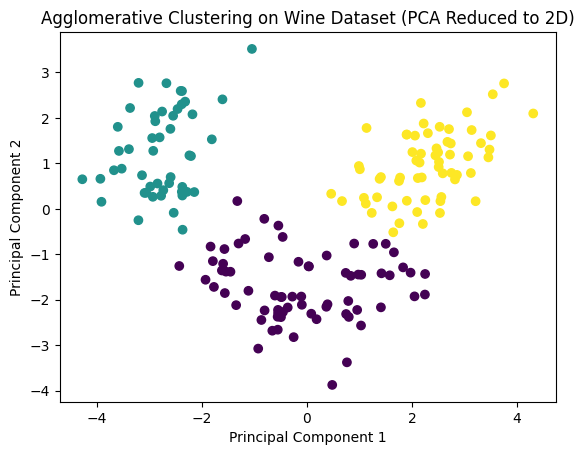

In [4]:
#9. Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative Clustering and visualize the result in 2D with a scatter plot.

import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
wine = load_wine()
X = wine.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X_pca)
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.title("Agglomerative Clustering on Wine Dataset (PCA Reduced to 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

10. You are working as a data analyst at an e-commerce company. The marketing team wants to segment customers based on their purchasing behavior to run targeted promotions. The dataset contains customer demographics and their product purchase history across categories.
- Choice of Clustering Algorithm
  - K-Means Clustering as the primary algorithm, potentially complemented by Hierarchical Clustering for interpretation.
- Data Preprocessing
  - I would impute missing values for numerical features with the median, and for categorical data with the mode, or drop them if they are insignificant.
- Determining the Number of Clusters
  - I would plot the Within-Cluster Sum of Squares against a range of
 values. I would look for the "elbow" point where the rate of decrease in WCSS slows down.
- Marketing Team Benefits
  - end exclusive discounts on high-margin items to "High-Value Loyalists" to increase brand loyalty.